# Porfolio Optimization

Portfolio optimization is a popular tool in the finance and investment world to make decisions on how to best meet financial goals considering relative risks involved.

This tutorial builds on what you have previously learned in the practical sessions and the online learning on the dataquest platform. It will teach you how to apply some basic portfolio optimization by running a simulation with randomly generated weights for each stock in your portfolio. Based on the simulated random weights, the returns and risk for the portfolio can be estimated using the sharpe ratio. A visualization of the results of the simulation, the efficient frontier, can be used to decide the optimal weights given the maximum risk someone is willing to take. In the last section, you will learn how to access the Fama French 3 data to analyse whether the portfolio contains a significant proportion of small-value stocks.



## Calculating returns

In this first section, we are going to look at different ways we can calculate returns for individual stocks and for a portfolio.

#### Importing libraries

We start by importing the libraries that we will need.

In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web

#### Downloading the stock price data from yahoo finance

We will download the stock data from Apple, Tesla and Microsoft to illustrate how we can calculate returns and portfolio returns.

In [742]:
tickers = 'AAPL TSLA MSFT'.split()

# We are only interested in the price data, 
# which is why we only select the 'Adj Close' column
daily_ret = yf.download(tickers, period='5y')['Adj Close']

[*********************100%***********************]  3 of 3 completed


#### Calcualting returns

You can calculate daily returns using the .pct_change() method.

In [744]:
daily_ret = daily_ret.pct_change()

daily_ret.head()

,AAPL,MSFT,TSLA
Date,,,
2016-03-21,NaN,NaN,NaN
2016-03-22,0.007648,0.003899,-0.017120
2016-03-23,-0.005529,-0.001849,-0.049778
2016-03-24,-0.004334,0.004447,0.023228
2016-03-28,-0.004542,-0.012359,0.011021


#### Calculating mean daily portfolio return using weights

Based on the mean daily stock returns, we can calculate the return for our portfolio of stocks. One way to do this, is by calculating the average returns of all stocks in the dataset using the .mean() method. We have to set the axis parameter to 1 so that we average across the columns and not the rows!

This generates a new column with the average daily returns.

In [746]:
port_rets = daily_ret.mean(axis=1)
port_rets

Date
2016-03-21         NaN
2016-03-22   -0.001858
2016-03-23   -0.019052
2016-03-24    0.007780
2016-03-28   -0.001960
                ...   
2021-03-12   -0.007279
2021-03-15    0.013651
2021-03-16   -0.006260
2021-03-17    0.009187
2021-03-18   -0.043296
Length: 1258, dtype: float64

This would be an equal weights portfolio - each stock contributes equally to the portfolio. We can also select specific weights for each stock in the portfolio. We will first create an array with weights for that, so that 50% of the portfolio will be Apple stocks, 25% will be Microsoft and anotehr 25% will be Tesla stocks.

In [778]:
# creating array with portfolio weights
weights = np.array([0.50, 0.25, 0.25])

Now we can calculate the portfolio returns using matrix multiplication with the .dot() method.

In [747]:
# calculating the mean portfolio return
port_rets = daily_ret.dot(weights)
port_rets

Date
2016-03-21         NaN
2016-03-22    0.000519
2016-03-23   -0.015671
2016-03-24    0.004751
2016-03-28   -0.002606
                ...   
2021-03-12   -0.007365
2021-03-15    0.016352
2021-03-16   -0.001509
2021-03-17    0.005278
2021-03-18   -0.040948
Length: 1258, dtype: float64

#### Calculating cumulative portfolio returns

You already know how to calculate cumulative returns using the .cumprod() method. The .cumprod() method creates a series of continuous products. By using .cumprod() we thus get the cumulative return for each day over the whole time period.

In [771]:
(port_rets+1).cumprod() - 1 

Date
2016-03-21         NaN
2016-03-22    0.000519
2016-03-23   -0.015161
2016-03-24   -0.010481
2016-03-28   -0.013060
                ...   
2021-03-12    6.430570
2021-03-15    6.552078
2021-03-16    6.540679
2021-03-17    6.580477
2021-03-18    6.270070
Length: 1258, dtype: float64

#### Calculating the total return

To calculate the total return, we can either use the .prod() method of the return series or the np.prod() function. They both carry out the same calculation.

In [772]:
# the .prod() method calculates the product
(port_rets+1).prod() - 1

6.270069624634849

In [773]:
# the np.prod() function carries out the same calculation
np.prod(port_rets+1) - 1

6.270069624634849

### Task - Calculating portfolio returns

1. Download the stock data for Google, Facebook and Amazon from the past 3 years.
2. Calculate the equal weighted portfolio returns.
3. Set your own portfolio weights and calculate the portfolio returns.
4. Compare the total returns. Which weights created better total returns?
5. Calculate the cumulative returns for each portfolio and plot them as a line in a single plot.

## Risk of a portfolio

The risk of a portfolio can be estimated by the portfolio variance which is calculated using the formula below. This is an example for a portfolio with two stocks.

$$\sigma_P^2 = w_1^2  \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \sigma_{1,2}$$

where
- $\sigma_P^2 = $ the portfolio variance
- $\sigma_1 = $ the variance of stock 1
- $\sigma_2 = $ the variance of stock 2
- $w_{1} = $ the weight of stock 1
- $w_{2} = $ the weight of stock 2
- $\sigma_{1,2} = $ the covariance between stock 1 and stock 2


This formula can be simplified by using the covariance matrix and multiplying the covariance with the vector of the weights as below.

$$ \sigma_P^2 = \begin{bmatrix} w_{1} & w_{} \end{bmatrix} \begin{bmatrix} \sigma_1^2 & \sigma_{1,2}  \\ \sigma_{2,1} & \sigma_2^2 \end{bmatrix}  \begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}  $$

All we need, to calculate the portfolio variance, is the covariance matrix and the weights array and combine them using the matrix product.

#### Covariance matrix

We can calculate the covariance matrix with the .cov() method

In [789]:
cov_mat = daily_ret.cov()
cov_mat

,AAPL,MSFT,TSLA
AAPL,0.000365,0.000236,0.000286
MSFT,0.000236,0.000301,0.000266
TSLA,0.000286,0.000266,0.001379


Since the covariance is the average variance per trading day, we have to multiply the covariance matrix by 250, the number of trading days in a year, to calculate the risk across the whole year. 

In [790]:
cov_mat *= 250
cov_mat

,AAPL,MSFT,TSLA
AAPL,0.091211,0.059017,0.071537
MSFT,0.059017,0.075210,0.066521
TSLA,0.071537,0.066521,0.344644


Now we can calculate the portfolio variance using the formula from above. We use the .dot() method to calculate the matrix products. We transpose the vector to change its orientation using the .T attribute.

In [795]:
port_var = cov_mat.dot(weights).dot(weights.T)
print(port_var)

0.08999705104248071


We can also express the portfolio risk as the standard deviation by taking the square root of the variance. This is in the same units as the returns, which makes it easier to use.

In [794]:
port_sd = np.sqrt(port_var)
print('The portfolio standard deviation is:', port_sd.round(2)*100, '%')

The portfolio standard deviation is: 30.0 %


### Task: Portfolio risk

Using the portfolio that you have created in the previous exercise:

1. Calculate the covariance matrix
2. Calculate portfolio variance
3. Convert it to stand deviation
4. Looking at the covariance matrix, which company has the highest risk inside the portfolio?

## Annualized returns

#### Formulas to calculate annualized returns

We can use annualized returns to calculate the projected or average return for a year. We can either calculate the yearly return from a smaller sample of days of months or calculate the average return from multiple years. In this case, we are making a projection about the year in total. We can use the below formulas to calculate the annual return based on a sample of days or months.

**Annualized return based on days sample**

- For 1-day sample

    $ (1 + r)^{365} - 1 $


- For n-day sample

    $ (1 + r)^{365/n} - 1$


In [814]:
# Example: Calculating the annual return from 5 days of return data.
daily_ret = np.array([0.001, 0.002, -0.001, 0.004, 0.01])
total_ret = (daily_ret + 1).prod() - 1
ann_ret = (total_ret + 1)**(365/5) - 1
print(total_ret)
print(ann_ret)

0.016067063931920034
2.2013509714648394


**Annualized return based on month sample**

- For 1 month sample

    $ (1 + r)^{12} - 1$


- For n month sample

    $ (1 + r)^{12/n} - 1$

In [817]:
# Example: Calculating the annual return from 2 months of return data.
mtl_ret = np.array([0.02, -0.01])
total_ret = (mtl_ret + 1).prod() - 1
ann_ret = (total_ret + 1)**(12/2) - 1
print(total_ret)
print(ann_ret)

0.009800000000000031
0.06025956273846256


We can also calculate the actual **average** annual return based on a total return for multiple years.

In this case, we have to take the n-th root of the total return

**Annualized return based on years sample**

- For n-years

    $ (1 + r)^{1/n} - 1$

In [816]:
# Example: Calculating the average annual return from 3 years of return data.
yearly_ret = np.array([0.05, -0.01, 0.03])
total_ret = (yearly_ret + 1).prod() - 1
ann_ret = (total_ret + 1)**(1/3) - 1
print(total_ret)
print(ann_ret)

0.07068500000000011
0.023027338215592108


### Task - Annualized Apple return

1. Import the stock data from Apple from the last month.
2. Calculate the total return.
3. Calculate the annualized return.

### Task - Annualized SP500 return
1. Import the stock data from the SP500 index for the last 5 years. The ticker is SPY.
2. Calculate the total return for the SP500 index.
3. Calculate the annualized return.

### Risk adjusted returns

A popular way to estimate the expected return relative to its risk is the sharp ratio, which combines the return rate and portfolio standard deviation together with the risk free rate. For this tutorial, we will assume a risk free rate of 1%.

$Sharpe Ratio = \frac{R_{p} - R_{f}}{\sigma_{p}}$

where: 

- $R_{p} = $  portfolio return rate
- $R_{f} = $ risk free rate
- $\sigma_{p} = $ portfolio standard deviation

The sharpe ratio can be calculated for a portfolio or a single stock. If we are using annualized return rates, we also have to annualize the stock volatility or risk, which is measured with the standard deviation of the returns. To calculate the annualized risk, we have to multiply the  standard deviation with the square root of the number of trading days, which is 250.

Let us start by calculating the sharpe ratio for a single stock. We will start with the Apple stock.

In [818]:
# import the stock data
aapl = yf.download('AAPL', period='3y')

# calculate the return rates
aapl_ret = aapl['Adj Close'].pct_change()

# calculate the total return over the whole period
aapl_total_ret = np.prod(aapl_ret + 1) - 1

# annualize the
aapl_ann_ret = (aapl_total_ret+1)**(1/3) - 1

# We also have to specify the risk free rate
risk_free = .01

# Now we calculate the annualized standard deviation
aapl_ann_sd = aapl_ret.std() * np.sqrt(250)

# Then we calculate the sharpe ratio
aapl_sr = (aapl_ann_ret - risk_free) / aapl_ann_sd

print('The sharpe ratio for Apple is:', round(aapl_sr,2), '%')

[*********************100%***********************]  1 of 1 completed
The sharpe ratio for Apple is: 1.15 %


### Task - Calculating sharpe ratio

1. Download the Tesla stock data for the last 5 years.
2. Calculate the return rates.
3. Calculate the annualized return rate.
4. Calculate the annualized standard deviation.
5. Calculate the sharpe ratio assuming a risk free rate of 1 percent.

## Portfolio optimization using a simulation

Now that we know how to calculate the sharpe-ratio, let us run a simulation to find the optimal weights for our portfolio. We are going to calculate the sharpe ratio for a large number of randomly created weights and then visualize the results of the simulation. 

We start with downloading the portfolio data.

In [270]:
tickers = 'MSFT AAPL AMZN TSLA NFLX FB GOOG'.split()

stock_data = yf.download(tickers, period='5y')['Adj Close']

returns = stock_data.pct_change()

returns

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2016-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-17,-0.001604,-0.025824,-0.010341,0.002296,0.005704,0.003724,0.020051
2016-03-18,0.001134,-0.013156,0.003873,-0.000244,-0.021405,0.014039,0.028094
2016-03-21,-0.000094,0.003441,0.003589,0.006087,0.006917,-0.000593,0.023975
2016-03-22,0.007648,0.011733,0.003576,-0.001806,0.003899,-0.012072,-0.017120
...,...,...,...,...,...,...,...
2021-03-09,0.040650,0.037568,0.040852,0.014095,0.028101,0.026575,0.196412
2021-03-10,-0.009167,-0.001701,-0.003161,0.001135,-0.005817,-0.003752,-0.008195
2021-03-11,0.016503,0.018298,0.033900,0.029070,0.020265,0.036707,0.047211


Now we are going to calculate some random weights to calculate the portfolio returns. np.random.uniform() generates an array with random numbers between 0 and 1 per default. 

In [308]:
wts = np.random.uniform(size=7)
print(wts)

[0.87042139 0.78844222 0.82927195 0.17919227 0.62304075 0.53467928
 0.6396998 ]


The weights do not add up to 1. We can fix that by dividing the weights by their sum.

In [309]:
wts = wts/sum(wts)
print(wts)

[0.19495422 0.17659278 0.1857377  0.04013491 0.13954669 0.11975577
 0.14327793]


Now we can use those weights to calculate the annualized portfolio return. We first calculate the cumulative return for all stocks.

In [317]:
cum_ret = np.prod(returns + 1) - 1
cum_ret

AAPL     4.100863
AMZN     4.397957
FB       1.489749
GOOG     1.855344
MSFT     3.798403
NFLX     4.336588
TSLA    14.679042
dtype: float64

And then we calculate the average cumulative return for the portfolio using the weights.

In [318]:
port_ret = (cum_ret*wts).sum()
print(port_ret)

5.079863207744957


Let's annualize the cumulative return

In [319]:
port_ann_ret = (port_ret + 1)**(1/5) - 1
print(port_ann_ret)

0.43475835226853254


In the next step, we have to calculate the portfolio standard deviation

In [340]:
# multiply covariances by number of trading days to annualize the risk
cov_mat = returns.cov() * 250
port_sd = np.sqrt(cov_mat.dot(wts).dot(wts.T))
print(port_sd)

0.2672334752515737


In the final step, we calculate the sharpe ratio using the risk free rate of 1%.

In [341]:
sr = (port_ann_ret - 0.01)/port_sd
print(sr)

1.5894653612114458


Let us combine all steps!

In [358]:
# define constants
tickers = 'MSFT AAPL AMZN TSLA NFLX FB GOOG'.split()
years = 5
risk_free = .01

# get stock data
stock_data = yf.download(tickers, period=str(years)+'y')['Adj Close']
returns = stock_data.pct_change()

# create random weights
wts = np.random.uniform(size = len(tickers))
wts /= sum(wts)
print('portfolio weights in percent:', wts*100)

# calculate the annualized portfolio return
cum_ret = np.prod(returns + 1) - 1
port_cum_ret = np.sum(cum_ret*wts)
port_ann_ret = (port_cum_ret + 1)**(1/years) - 1
print('annualized portfolio return', round(port_ann_ret*100, 2), '%')

# calculate portofolio standard deviation
cov_mat = returns.cov() * 250
port_sd = np.sqrt(cov_mat.dot(wts).dot(wts.T))
print('annualized portfolio risk:', round(port_sd*100, 2), '%')

# calculate sharpe ratio
sharpe = (port_ann_ret - risk_free) / port_sd
print('sharpe ratio:', sharpe)


[*********************100%***********************]  7 of 7 completed
portfolio weights in percent: [16.59195486  8.15756626 18.9910954  15.96927259 17.09729944  7.67108855
 15.5217229 ]
annualized portfolio return 42.57 %
annualized portfolio risk: 26.49 %
sharpe ratio: 1.5689514548919914


#### Automatizing the calculation of the sharpe ratios 

Now we will simulate several thousand weights to determine the optimal portfolio. We first create the arrays, we will use to store the weights and the associated portfolio return, risk and sharpe ratio. Then we run a for loop to create the weights calculate the statistics and store them in the arrays.

In [2]:
# define constants
tickers = 'MSFT AAPL AMZN TSLA NFLX FB GOOG'.split()
years = 5
risk_free = .01
n_sim = 10000

# download stock data
stock_data = yf.download(tickers, period=str(years)+'y')['Adj Close']
returns = stock_data.pct_change()

# create arrays
port_rets = np.zeros(n_sim)
port_risks = np.zeros(n_sim)
port_wts = np.zeros((n_sim, len(tickers)))
sharpe_ratios = np.zeros(n_sim)

# run main loop
for i in range(n_sim):
    
    # create weights
    wts = np.random.uniform(size=len(tickers))
    wts /= sum(wts)
    
    # calculate the annualized portfolio return
    cum_ret = np.prod(returns + 1) - 1
    port_cum_ret = np.sum(cum_ret*wts)
    port_ann_ret = (port_cum_ret + 1)**(1/years) - 1
    
    # calculate portofolio standard deviation
    cov_mat = returns.cov() * 250
    port_sd = np.sqrt(cov_mat.dot(wts).dot(wts.T))
    
    # calculate sharpe ratio
    sharpe_ratio = (port_ann_ret - risk_free) / port_sd
        
    port_rets[i] = port_ann_ret
    port_risks[i] = port_sd
    port_wts[i] = wts
    sharpe_ratios[i] = sharpe_ratio
    

print('done')   

[*********************100%***********************]  7 of 7 completed
done


### Task - Running a portfolio simulation

1. Select at least 4 stocks for your portfolio.
2. Download the stock data, choose a period of years.
3. Create empty arrays for the portfolio weights, returns, risks and sharpe ratio.
4. Write the for loop to simulate 5000 random weights, calculate the statistics.

### Visualizing the results

We are now going to visualize the output of the simulation.

#### Comparing portfolios

First, let us have a look at the portfolios with the minimum variance, maximum return and the highest sharpe ratio. We need to select the weights from the port_wts array corresponding to the lowest risk, highest return and maximum sharpe ratio. We can use the .argmin() and .argmax() method on the port_risks, port_rets and sharpe_ratios array to get the index of the lowest or highest values. The index can be used to select the corresponding weights from the port_wts array.

In [614]:
min_var_wts = port_wts[port_risks.argmin()]
max_ret_wts = port_wts[port_rets.argmax()]
max_sharpe_wts = port_wts[sharpe_ratios.argmax()]

We plot the three portoflio weights in separate barplots in one figure. To apply different colors we use the colors from the tab20 color palette, which you can get with the get_cmap() function.

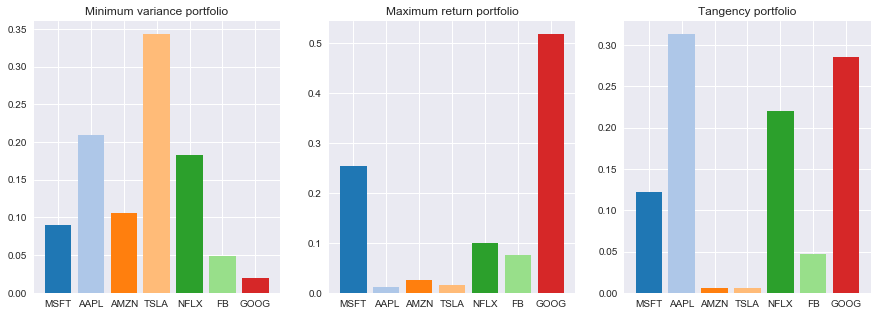

In [105]:
pastel = plt.get_cmap('tab20')
plt.style.use('seaborn')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.bar(x=tickers, height=min_var_wts, color = pastel.colors)
ax1.set_title('Minimum variance portfolio')

ax2.bar(x=tickers, height=max_ret_wts, color = pastel.colors)
ax2.set_title('Maximum return portfolio')

ax3.bar(x=tickers, height=max_sharpe_wts, color=pastel.colors)
ax3.set_title('Tangency portfolio')

plt.show()

In the next step, we are going to create a plot of the efficient frontier, which represents the portfolios with the lowest risk given a level of expected return or vice versa. 

We use the scatter() function to plot the portfolio risk on the x-axis an the portfolio returns on the y-axis. With the c parameter we also add a color coding for the sharpe ratios.

In the graph below, the efficient frontier is indicated by the 'edge' that is formed by the data points in the scatter plot. Although we have only simulated a limited number of portfolios, we know that there are no possible portfolios outside that edge. We can use the efficient frontier, to select the portfolio with the lowest risk given an expected return or vice versa.

In the next step, we will also add a colorbar to better interpret the sharpe ratio values.

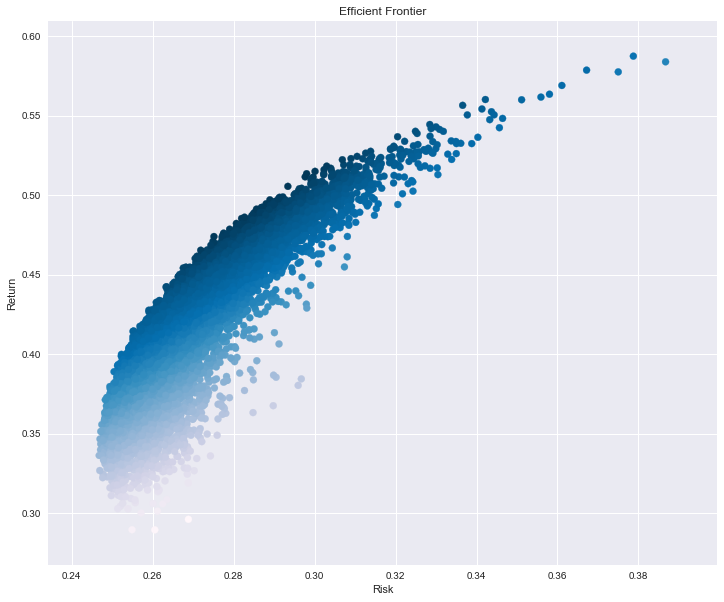

In [89]:
# set figure size and assign the ax to _, since we won't use it
fig, _ = plt.subplots(figsize=(12,10))

# set the colormap back to a continuous one, in this case PuBu
plt.rcParams['image.cmap'] = 'PuBu'

# plot the data, port_risks on x-axis, port_rets on y-axis and sharpe
# ratios with a colour coding
plt.scatter(x=port_risks, y=port_rets, c=sharpe_ratios)

plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()

#### Adding a colorbar

To add a colorbar that gives a color scale for the sharpe ratio values, we can use the plt.colorbar() function. We also add a label for the colorbar using the .set_label() method.

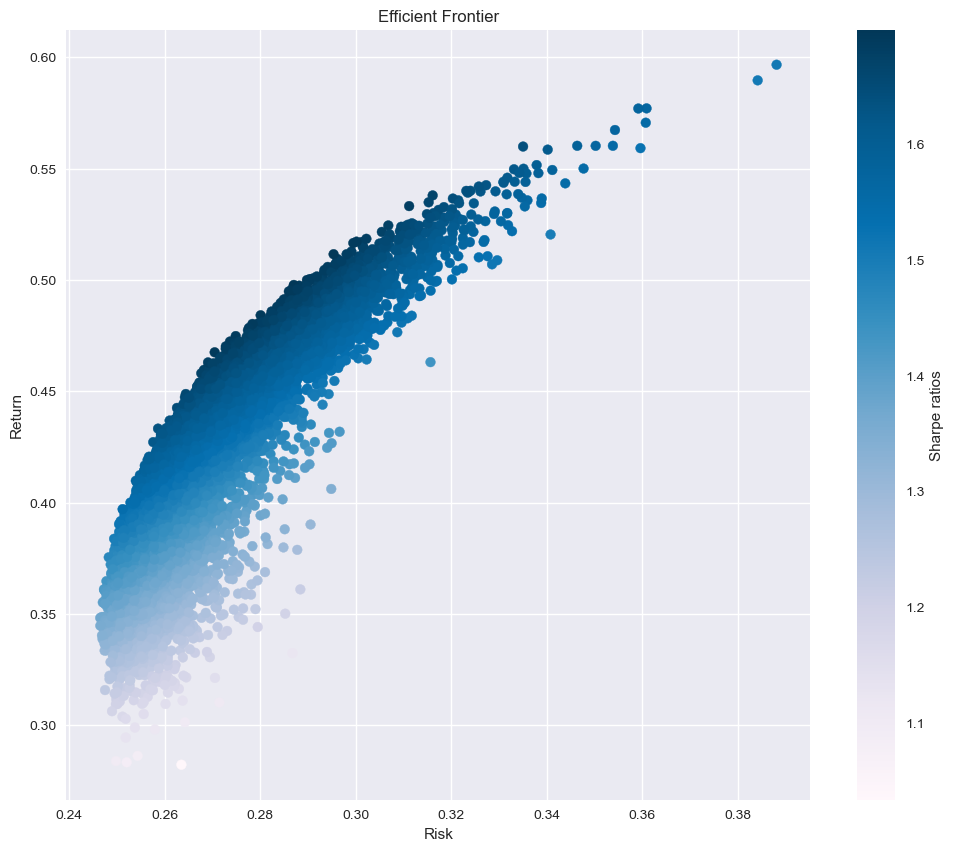

In [504]:
fig, _ = plt.subplots(figsize=(12,10))

plt.rcParams['image.cmap'] = 'PuBu'

plt.scatter(x=port_risks, y=port_rets, c=sharpe_ratios)

cbar = plt.colorbar()
cbar.set_label('Sharpe ratios')

plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()

### Task - Visualize the results

1. Select the weights for the portfolio with the minimum variance, maximum returns and optimal sharpe ratio.
2. Plot all three sets of weights in a single figure as barplots. Chose a color palette as in the example. Try out different ones from this list: 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Set2'.
3. Create a scatter plot of all simulated portfolios, plotting the risk on the x-axis, the return on the y-axis and the sharpe ratio as a color coding. Also add a colorbar.
4. Inspect the efficient frontier. Is a reduction in expected return always associated with an increase in risk?

## Fama French 3 portfolio evaluation

#### Capital assest pricing model (CAPM)

The capital assest pricing model was developed to provide an estimate of the systematic risk or market risk in order to determine whether a individual stock should be added to a portfolio. Below is the CAPM formula.

$ r_i = R_F + \beta * (RMRF) $

where:
- $R_i = $ Expected return on a security
- $R_F = $ Risk-free rate
- $RMRF = $ Excess return of the market (market return - risk free rate)
- $\beta = $ Beta of the security

The crucial factor in this equation is beta. Beta describes the volatility of the stock relative to the market. A positive beta indicates higher volatility than the market. A beta of 1 indicates volatility similar to the market. A negative beta implies lower volatility than the market. One way to estimate beta is to regress 5 years of stock returns on the corresponding market returns. The market return is often estimated based on the SP500 returns.

#### Fama french 3 model and factor returns

According to CAPM, the only relevant variable to take into account when making stock investment decisions is the beta, the volatility of the stock relative to the market. Fama and French extended the CAPM model by showing that there are additional factors that together do a better job to estimate stock return rates. The factors that they identified in their intial model, the Fama French 3 model, are Book-to-market equity and market capitalization. They found that small companies with high book-to-market equity generate on average the highest returns when making long-term investments.

Below is the formula of the Fama French 3 model:

$R_i = R_F + \beta^{mkt} RMRF + \beta_i^{size} SMB + \beta_i^{value} HML $

where:
- $R_i = $ Expected return on a security
- $R_F = $ Risk-free rate
- $RMRF = $ Excess return of the market (market return - risk free rate)
- $\beta^{mkt} = $ Beta of the security relative to the market volatility
- $\beta^{size} = $ Beta of the security relative to the size of factor
- $\beta^{value} = $ Beta of the security relative to the value factor


#### How is the data generated

The key thing to understand about the formula is that the SMB and HML values are monthly return values comparing specific type of stock companies. The SMB returns are calculated by taking all companies, sorting them according to their market cap and then splitting them using the median. Then, the difference in monthly return rates for small - big companies is calculated, hence the SMB (Small Minus Big). Similarly, to generate the HML returns, all companies are sorted according to their book-to-market equity and the return rates for high book-to-market companies - low book-to-market companies are calculated on a monthly basis. HML stands for High Minus Low (book-to-market equity). For the HML returns, companies above the 70th percentile are categorized as high book-to-market equity and companies below 30th percentile are categorized as low book-to-market equity.

#### Evaluating portfolios using the Fama French data

The studies from Fama and French suggest that stocks with a low size and high value outperform other stocks in the long term. A well diversified portfolio should therefore include a significant proportion of small value stocks. It is possible to get an estimate of the proportion of small value stocks in a portfolio by running a regression using the formula:

$R_i - R_F = \alpha_i + \beta^{mkt} RMRF + \beta_i^{size} SMB + \beta_i^{value} HML$

The new term $\alpha$ is the intercept of the regression line and reflects the excess return that the portfolio has generated compared to the market return.

We already know how to interpret the $\beta^{mkt}$ value which indicates the volatility of the portfolio relative to the market volatility. The new coeffcients $\beta_i^{size}$ and $\beta_i^{value}$ reflect how strongly the portfolio returns vary with the size and value returns. The size and value returns are the returns of small and value companies minus the returns of large and growth companies. If a portfolio is well diversified and contains a substantial amount of small companies it should correlate positively with size factor returns. If the portfolio also contains a substantial level of value companies it should correlate positively with the value factor returns.

#### Importing the libraries

We will first import the pandas_datareader library and the statsmodels.api module. We will need these libraries to download the Fama French 3 model data and to run the regression analysis.

In [729]:
import pandas_datareader.data as web
import statsmodels.api as sm

#### Preparing the portfolio data

Before we deal with the Fama French data, let us first prepare the portfolio data for the analysis. The portfolio data is still stored in the returns variable.

In [720]:
returns.head()

,AAPL,AMZN,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2016-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-21,-0.000094,0.003441,0.003589,0.006087,0.006917,-0.000593,0.023975
2016-03-22,0.007648,0.011733,0.003576,-0.001806,0.003899,-0.012072,-0.017120
2016-03-23,-0.005529,0.016325,0.002584,-0.003631,-0.001849,-0.002504,-0.049778
2016-03-24,-0.004334,0.023384,0.004532,-0.003740,0.004447,-0.012351,0.023228


First, we need to calculate the daily portfolio returns based on the optimal weight, which we estimated in the previous step using the simulation.

To calculate the portolio returns, we can use the .dot() method on the returns dataframe. The .dot() method calculates the matrix product of the returns and the weights. Instead of adding the portfolio returns as a column to the returns dataset, we create a new dataframe with only the portfolio returns, since we do not need the values from each stock for the analysis.

In [721]:
my_port = pd.DataFrame(data = returns.dot(max_sharpe_wts),
                         columns=['my_port'])
my_port.head()

,my_port
Date,
2016-03-18,NaN
2016-03-21,0.008909
2016-03-22,0.000993
2016-03-23,-0.010401
2016-03-24,0.011335


The Fama French data, which we will download in the next step, have values for each month. In order to use both datasets for the analysis, we will have to aggregate the portfolio returns to a monthly value. 

In the previous practical sessions, you have learned to use extract the year and month value from the index and then group the dataframe based on these columns. Another way to group based on dates, is using the .resample() method.

You can create groups for each month, using the 'M' argument and then averageing the values from each month with the .mean() method.

In [727]:
my_port.resample('M').mean()

,my_port
Date,
2016-03-31,0.003697
2016-04-30,-0.001079
2016-05-31,0.001890
2016-06-30,-0.001431
2016-07-31,0.004523
...,...
2020-11-30,0.007400
2020-12-31,0.004473
2021-01-31,0.002266


To calculate the cumulative returns for each month, we have to add 1 to the return values first, then resample them for each month and calculate the product using .prod() and then subtract 1 again from the cumulative returns for each month.

In [ ]:
my_port_mtl = (my_port + 1).resample('M').prod()
my_port_mtl -= 1

The dataframe now contains the cumulative return for each month.

In [728]:
my_port_mtl.head()

,my_port
Date,
2016-03-31,0.029692
2016-04-30,-0.023874
2016-05-31,0.039150
2016-06-30,-0.032974
2016-07-31,0.093832


#### Downloading Fama French data with pandas_datareader

We are now going to download the Fama French data using the pandas-datareader library. To download the 3 factor data we have to pass the strings 'F-F_Research_Data_Factors' and 'famafrench'. 'famafrench' is the source from which all Fama French data is downloaded. 'F-F_Research_Data_Factors' will download the 3 factor data.

The data we get is a dictionary with key 0 for the monthly data and key 1 for the annual data.

In [730]:
ff_data = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2016-03-01')
ff_data

{0:          Mkt-RF   SMB    HML    RF
 Date                              
 2016-03    6.96  0.82   1.11  0.02
 2016-04    0.92  0.69   3.28  0.01
 2016-05    1.78 -0.27  -1.60  0.01
 2016-06   -0.05  0.64  -1.40  0.02
 2016-07    3.95  2.60  -1.23  0.02
 2016-08    0.50  1.13   3.31  0.02
 2016-09    0.25  2.04  -1.21  0.02
 2016-10   -2.02 -4.43   4.07  0.02
 2016-11    4.86  5.47   8.22  0.01
 2016-12    1.81  0.11   3.51  0.03
 2017-01    1.94 -1.06  -2.81  0.04
 2017-02    3.57 -2.01  -1.79  0.04
 2017-03    0.17  1.17  -3.33  0.03
 2017-04    1.09  0.72  -2.11  0.05
 2017-05    1.06 -2.61  -3.67  0.06
 2017-06    0.78  2.15   1.45  0.06
 2017-07    1.87 -1.47  -0.36  0.07
 2017-08    0.16 -1.62  -2.19  0.09
 2017-09    2.51  4.47   3.14  0.09
 2017-10    2.25 -1.95   0.12  0.09
 2017-11    3.12 -0.58  -0.09  0.08
 2017-12    1.06 -1.29   0.17  0.09
 2018-01    5.58 -3.09  -1.32  0.11
 2018-02   -3.65  0.30  -1.01  0.11
 2018-03   -2.35  4.05  -0.12  0.12
 2018-04    0.29  1.13   

We select the monthly data.

In [731]:
ff_data = ff_data[0]
ff_data.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-03,6.96,0.82,1.11,0.02
2016-04,0.92,0.69,3.28,0.01
2016-05,1.78,-0.27,-1.60,0.01
2016-06,-0.05,0.64,-1.40,0.02
2016-07,3.95,2.60,-1.23,0.02


#### Merging the data

In the next step, we will combine the portfolio returns data and the Fama French data into a single dataframe, since it makes it easier to prepare the data for the regression and run the regression in the final step.

In order to merge the two datasets, we need a column that has unique values for each row in both datasets. We can use the index column, since there should be only one value for each months over the whole time period. Let us have a look at the values in the index of both datasets.

In [717]:
ff_data.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-03,6.96,0.82,1.11,0.02
2016-04,0.92,0.69,3.28,0.01
2016-05,1.78,-0.27,-1.60,0.01
2016-06,-0.05,0.64,-1.40,0.02
2016-07,3.95,2.60,-1.23,0.02


In [718]:
my_port_mtl.head()

,my_port
Date,
2016-03-31,0.029692
2016-04-30,-0.023874
2016-05-31,0.039150
2016-06-30,-0.032974
2016-07-31,0.093832


If we look at the index of both dataframes, we see that they are in a different format. This is a problem, since we want to merge both dataframes into a single dataframe using the index as the identifier for an observation. Below you can see that the ff_data has a monthly PeriodIndex, while the my_port_mtl dataset has a DatetimeIndex that also contains a day value.

We will have to change the format of the index of our my_port_mtl dataframe to the same format as the index of the ff_data dataframe. 

In [663]:
ff_data.index

PeriodIndex(['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
             '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
            dtype='period[M]', name='Date', freq='M')

In [676]:
my_port_mtl.index

DatetimeIndex(['2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
      

We can change the format using the .to_period() method on the index of the my_port_mtl dataframe and then reassign the values to the actual index.

In [677]:
my_port_mtl.index = my_port_mtl.index.to_period('M')

Now the index of the my_port_mtl dataframe is also in the period format.

In [679]:
my_port_mtl.index

PeriodIndex(['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
             '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03'],
            dtype='period[M]', name='Date', freq='M')

We are now going to combine both datasets into a single dataframe, since that makes it easier to prepare the data and run the regression analysis.

The `pd.merge()` function can be used to combine the data. There are other ways, how we could have combined the data, but merging them on the Date column is the preferred way. A merge will combine data from two datasets by using the values in a specific column to match the observations from both datasets. This column needs to have unique values for each row in the data, so that it can be used to identify the rows.

We pass 4 arguments to the `pd.merge()` function:
1. `my_port_mtl`: The dataframe to be added first.
2. `ff_data`: The dataframe that will be added next.
3. `on='Date'`: with the on parameter we can tell the function which column should be used to match the data from both datasets. We pass the Date column, since it has a unique value for each month over the whole time period in both datasets.
4. `indicator=True`: By setting the indicator to True, the combined dataframe will have another column called _merge which tells us whether data has been merged correclty for each month.

In [695]:
ff_merge = pd.merge(my_port_mtl, ff_data, on='Date', indicator=True)

We now have a dataframe that combines both our portfolio returns and the Fama French data.

In [697]:
ff_merge

,my_port,Mkt-RF,SMB,HML,RF,_merge
Date,,,,,,
2016-03,0.029692,6.96,0.82,1.11,0.02,both
2016-04,-0.023874,0.92,0.69,3.28,0.01,both
2016-05,0.039150,1.78,-0.27,-1.60,0.01,both
2016-06,-0.032974,-0.05,0.64,-1.40,0.02,both
2016-07,0.093832,3.95,2.60,-1.23,0.02,both
2016-08,-0.010268,0.50,1.13,3.31,0.02,both
2016-09,0.023680,0.25,2.04,-1.21,0.02,both
2016-10,-0.003854,-2.02,-4.43,4.07,0.02,both
2016-11,-0.023323,4.86,5.47,8.22,0.01,both


Let us check that the data has been merged correctly for each month. The _merge column should have the value 'both' in each row. We can check this, by using the np.all() function, which tests whether all values are True.

With the conditional statement `ff_merge['_merge'] == 'both'`, we test whether the values in the _merge column are equal to 'both', which returns a boolean array. If all values in the boolean array are True, the np.all() function will return True. If there were one or more False values, the np.all() function would return False.

We can see that all values are equal to 'both', which means for each month we could merge data from our portfolio returns with the Fama French data.

In [699]:
np.all(ff_merge['_merge'] == 'both')

True

Let us remove the _merge column

We have a few more steps to carry out on the data before we can run the regression. First, we are going to remove the merge column, since we don't need it anymore.

In [703]:
ff_merge = ff_merge.drop(columns='_merge')

Looking at the data, we see, that the return values in the Fama French columns are in percentage and not in decimal format. We have to devide those columns by 100.

In [704]:
ff_merge.head()

,my_port,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-03,0.029692,6.96,0.82,1.11,0.02
2016-04,-0.023874,0.92,0.69,3.28,0.01
2016-05,0.039150,1.78,-0.27,-1.60,0.01
2016-06,-0.032974,-0.05,0.64,-1.40,0.02
2016-07,0.093832,3.95,2.60,-1.23,0.02


We can use the /= operator, which devides by the value following the equal sign and then reassigns to the same variables.

In [ ]:
ff_merge[['Mkt-RF', 'SMB', 'HML']] /= 100

In [707]:
ff_merge.head()

,my_port,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-03,0.029692,0.0696,0.0082,0.0111,0.02
2016-04,-0.023874,0.0092,0.0069,0.0328,0.01
2016-05,0.039150,0.0178,-0.0027,-0.0160,0.01
2016-06,-0.032974,-0.0005,0.0064,-0.0140,0.02
2016-07,0.093832,0.0395,0.0260,-0.0123,0.02


The regression we will run will be using the excess portfolio returns as the dependent variable, that means, we will have to subtract the risk free rate from the portfolio returns.

In [708]:
ff_merge['my_port'] = ff_merge['my_port'] - ff_merge['RF']

In [709]:
ff_merge.head()

,my_port,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-03,0.009692,0.0696,0.0082,0.0111,0.02
2016-04,-0.033874,0.0092,0.0069,0.0328,0.01
2016-05,0.029150,0.0178,-0.0027,-0.0160,0.01
2016-06,-0.052974,-0.0005,0.0064,-0.0140,0.02
2016-07,0.073832,0.0395,0.0260,-0.0123,0.02


#### Running the regression

We will use the statsmodels.api library to run the regression analysis. First, we will add a constant to our dataframe using the sm.add_constant() function. We need a constant for the regression to also include an intercept.

In [735]:
ff_merge = sm.add_constant(ff_merge)

A new column named const with the value 1.0 has been added to the dataframe.

In [736]:
ff_merge.head()

,const,my_port,Mkt-RF,SMB,HML,RF
Date,,,,,,
2016-03,1.0,0.009692,0.0696,0.0082,0.0111,0.02
2016-04,1.0,-0.033874,0.0092,0.0069,0.0328,0.01
2016-05,1.0,0.029150,0.0178,-0.0027,-0.0160,0.01
2016-06,1.0,-0.052974,-0.0005,0.0064,-0.0140,0.02
2016-07,1.0,0.073832,0.0395,0.0260,-0.0123,0.02


To run the regression, we use the sm.OLS() function to create the model. The first parameter being passed to the OLS function is the outcome or dependent variable, which is the mY_port column. The second parameter is the list of predictors or independent variables, which is the constant, excess market return, the factor returns and the risk free rate.

We can then run the summary() method on the results object to get a nice summary of the output.

In [834]:
mod = sm.OLS(ff_merge['my_port'], ff_merge[['const', 'Mkt-RF', 'SMB', 'HML', 'RF']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                my_port   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     64.30
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           6.76e-20
Time:                        17:38:39   Log-Likelihood:                 95.890
No. Observations:                  59   AIC:                            -181.8
Df Residuals:                      54   BIC:                            -171.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.012      2.320      0.024       0.004       0.052
Mkt-RF         1.3226      0.157      8.434      0.000       1.008       1.637
SMB           -0.4575      0.280     -1.633      0.108      -1.019       0.104
HML           -0.6751      0.208     -3.246      0.002      -1.092      -0.258
RF            -1.1300      0.102    -11.108      0.000      -1.334      -0.926
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.883
Skew:                           0.415   Prob(JB):                        0.390
Kurtosis:                       2.722   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation of results

For the purpose of this analysis, we are mostly interested in the numbers in the second table, which lists the different variables in the model (const, Mkt-RF, SMB, HML, RF). The coef column lists the regression coefficients or beta for each variable in the model. The remaining columns are primarily relevant for the statistical significance of the regression coefficients.

We might have been able to guess, that we would expect a negative relationshiop with SMB and HML, since our portfolio only consists of large companies with a low book-to-market equity. The beta for the excess market returns is larger than 1, which indicates that the portfolio has a higher risk than the market. The constant represents the alpha value, which is the excess returns when the market return is 0. The fact, that the constant is 0.028 suggests that the portfolio outperformed the market by 2.8%.

### Task - Fama French 3 model portfolio evaluation

1. Pick a fund that you are interested in. You can also have a look at the [yahoo finance top mutual funds list](https://finance.yahoo.com/screener/predefined/top_mutual_funds), which already shows the symbol in the first column.
2. Download the fund data from yahoo finance for the last 5 years or the maximum available period.
3. Download the Fama French data.
4. Prepare both dataset, so that you can merge them. You will have resample the data from your fund to monthly data, check that both have the same range of dates and change the index for the fund returns to a period index.
5. Merge both datasets.
6. Run the regression. What do the results indicate?